In [129]:
# PHASE 1: DATA COLLECTION AND EDA

## Step 1 - Data Collection and Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [131]:
# Load dataset
df = pd.read_csv("H:\\Datascience\\Tutedude\\employee_data.csv")

In [133]:
df.head()

,EmployeeID,Name,Age,Department,Salary,YearsAtCompany,PerformanceScore,Attrition
0,1,John Doe,29,Sales,55000,3,80,No
1,2,Jane Smith,35,HR,60000,7,85,No
2,3,Michael Brown,40,Engineering,80000,10,95,Yes
3,4,Emily Davis,28,Marketing,65000,5,78,No
4,5,David Johnson,50,Sales,75000,20,88,Yes


In [135]:
# Handle missing values for numeric columns only
numeric_cols = df.select_dtypes(include=['number']).columns  # Select only numeric columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

# Remove duplicates
df.drop_duplicates(inplace=True)

# Clean inconsistent data: Example for the 'Department' column
if 'Department' in df.columns:
    df['Department'] = df['Department'].str.strip().str.title()

print("Dataset cleaned successfully!")

Dataset cleaned successfully!


In [137]:
print("Descriptive Statistics:")
print(df.describe())

Descriptive Statistics:
       EmployeeID         Age        Salary  YearsAtCompany  PerformanceScore
count  100.000000  100.000000    100.000000      100.000000        100.000000
mean    50.500000   36.570000  72820.000000       10.800000         84.940000
std     29.011492    8.318478  12643.823102        6.361183          6.349771
min      1.000000   25.000000  43000.000000        1.000000         70.000000
25%     25.750000   29.750000  65000.000000        5.000000         80.000000
50%     50.500000   35.000000  72000.000000       10.000000         85.500000
75%     75.250000   41.250000  82750.000000       16.000000         90.000000
max    100.000000   60.000000  95000.000000       25.000000         95.000000


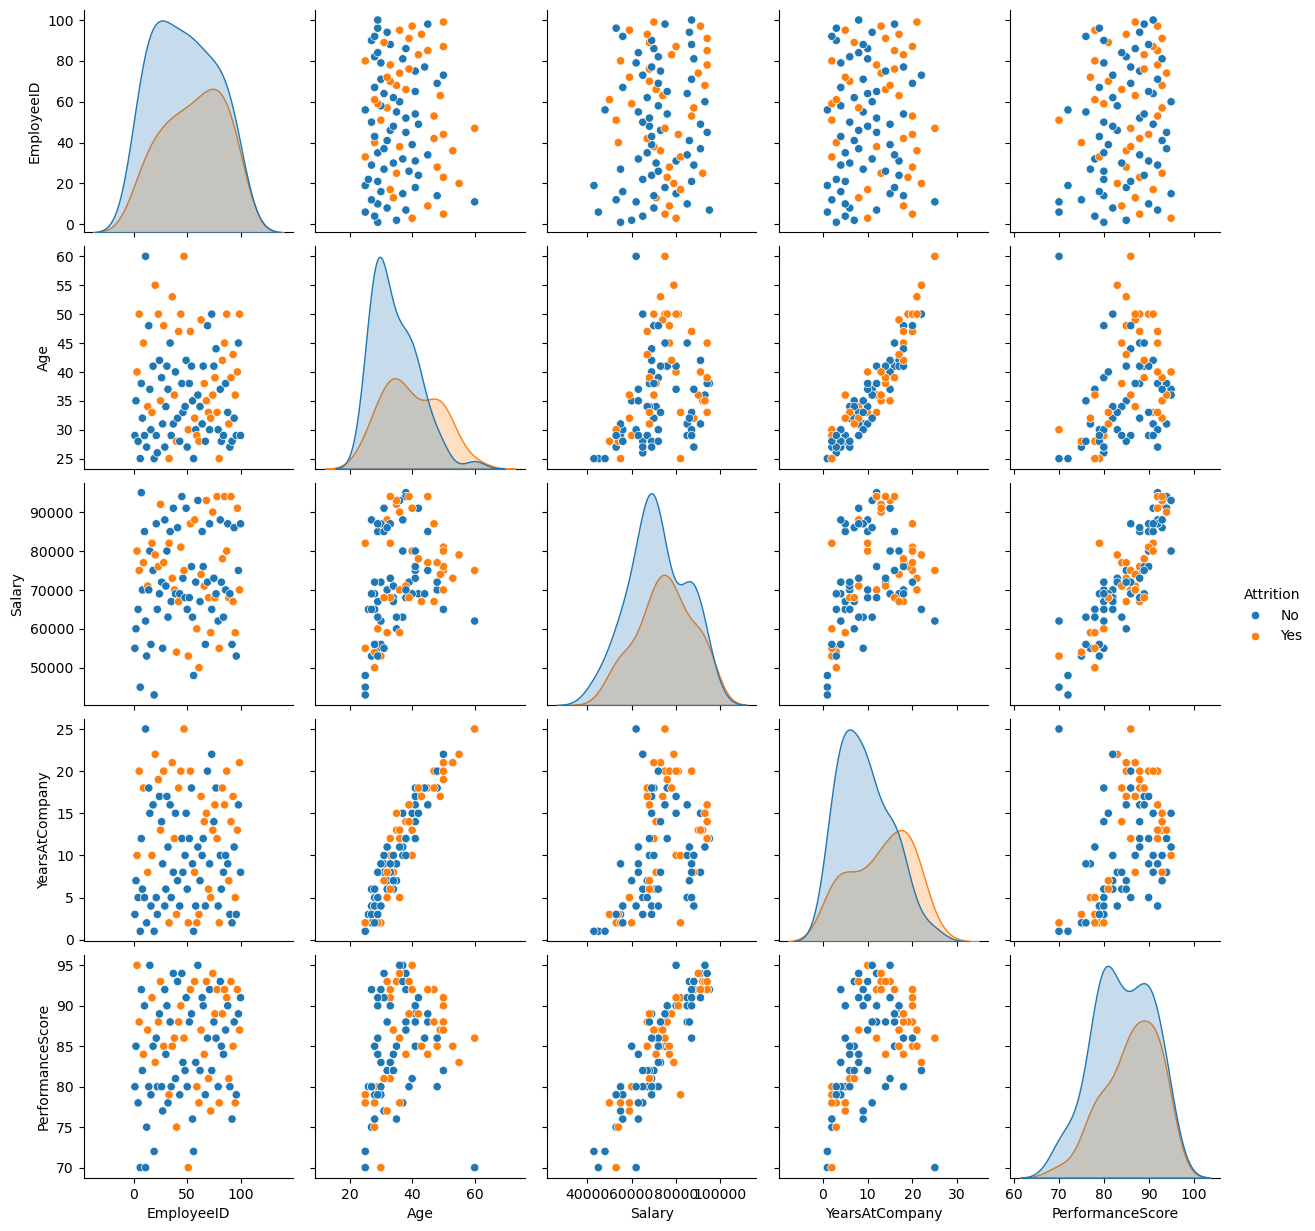

In [141]:
# Exploratory Data Analysis
# Pairplot
sns.pairplot(df, hue='Attrition')
plt.show()

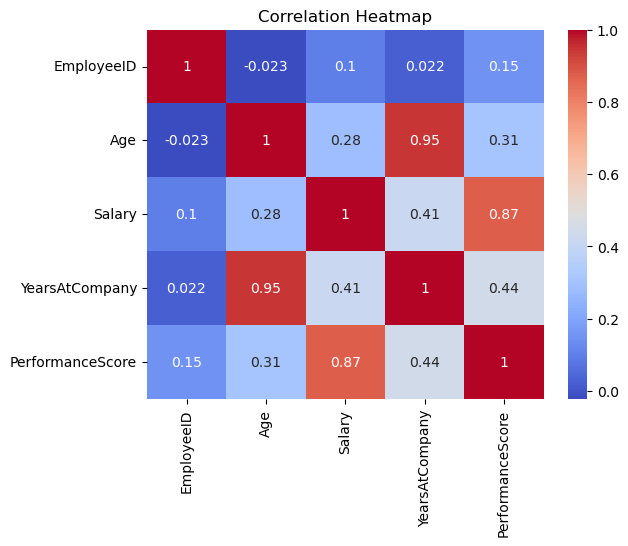

In [143]:
# Correlation Heatmap
correlation = df.select_dtypes(include=['number']).corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

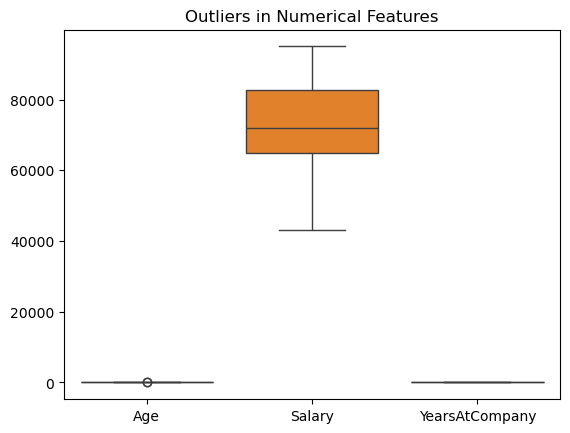

In [145]:
# Boxplot
sns.boxplot(data=df[['Age', 'Salary', 'YearsAtCompany']])
plt.title('Outliers in Numerical Features')
plt.show()

In [147]:
# Attrition Probability by Department
attrition_by_department = df[df['Attrition'] == 'Yes']['Department'].value_counts(normalize=True)
print("Attrition Probability by Department:\n", attrition_by_department)

Attrition Probability by Department:
 Department
Sales          0.358974
Engineering    0.307692
Hr             0.230769
Marketing      0.102564
Name: proportion, dtype: float64


In [149]:
# Bayes Theorem - P(Attrition|PerformanceScore) 

performance_attrition_mean = df[df['Attrition'] == 'Yes']['PerformanceScore'].mean()
performance_overall_mean = df['PerformanceScore'].mean()
attrition_prob = (df['Attrition'] == 'Yes').mean()

bayes_result = (performance_attrition_mean * attrition_prob) / performance_overall_mean
print("Bayesian P(Attrition | PerformanceScore):", bayes_result)

Bayesian P(Attrition | PerformanceScore): 0.39545561572874965


In [153]:
from scipy.stats import f_oneway

In [155]:
#ANOVA - PerformanceScore across Departments 

groups = [df[df['Department'] == dept]['PerformanceScore'] for dept in df['Department'].unique()]
f_stat, p_value = f_oneway(*groups)
print("ANOVA Test - p-value:", p_value)

ANOVA Test - p-value: 2.5591493445552222e-12


In [159]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [212]:
# Encode + Scale
scaler = StandardScaler()
df[['Salary', 'PerformanceScore']] = scaler.fit_transform(df[['Salary', 'PerformanceScore']])

print("Scaled Numerical Features (Salary and PerformanceScore):")
print(df[['Salary', 'PerformanceScore']].head())

Scaled Numerical Features (Salary and PerformanceScore):
     Salary  PerformanceScore
0 -1.416484         -0.781900
1 -1.019042          0.009497
2  0.570727          1.592290
3 -0.621600         -1.098459
4  0.173285          0.484335


In [214]:
encoder = LabelEncoder()
df['Attrition'] = encoder.fit_transform(df['Attrition'])
df['Department'] = encoder.fit_transform(df['Department'])

print("\nEncoded Categorical Features (Attrition and Department):")
print(df[['Attrition', 'Department']].head())


Encoded Categorical Features (Attrition and Department):
   Attrition  Department
0          0           3
1          0           1
2          1           0
3          0           2
4          1           3


In [169]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, r2_score, mean_squared_error, mean_absolute_error

In [171]:
# Random Forest Classification
X_cls = df.drop(columns=['EmployeeID', 'Name', 'Attrition'])
y_cls = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)


Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.77      0.77        13
           1       0.57      0.57      0.57         7

    accuracy                           0.70        20
   macro avg       0.67      0.67      0.67        20
weighted avg       0.70      0.70      0.70        20



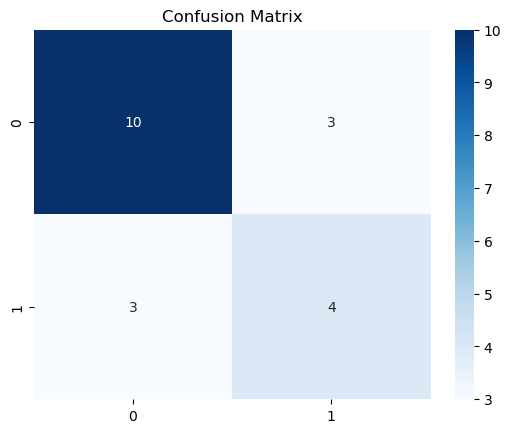

In [173]:
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [175]:
# Linear Regression
X_reg = df.drop(columns=['EmployeeID', 'Name', 'PerformanceScore'])
y_reg = df['PerformanceScore']
X_reg = pd.get_dummies(X_reg, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

print("Linear Regression R²:", r2_score(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))

Linear Regression R²: 0.7487625823959063
MSE: 0.32137623991304387
MAE: 0.36295675871413463


In [177]:
cv_scores = cross_val_score(reg, X_reg, y_reg, cv=5, scoring='r2')
print("Cross-validated R² scores:", cv_scores)
print("Mean CV R²:", cv_scores.mean())

Cross-validated R² scores: [0.57627855 0.62291611 0.83091738 0.81388717 0.80977423]
Mean CV R²: 0.7307546887368217


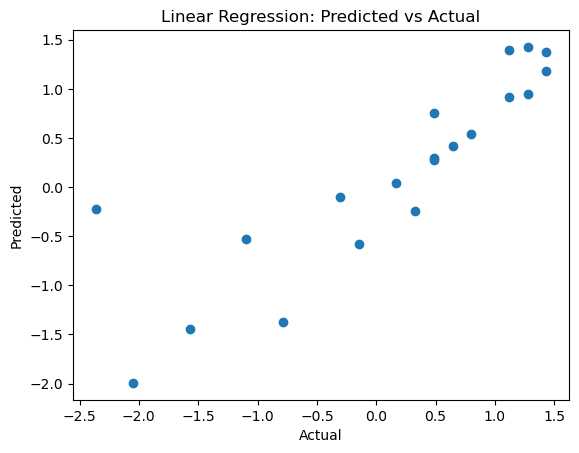

In [179]:
# Predicted vs Actual Plot
plt.scatter(y_test, y_pred)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Linear Regression: Predicted vs Actual")
plt.show()

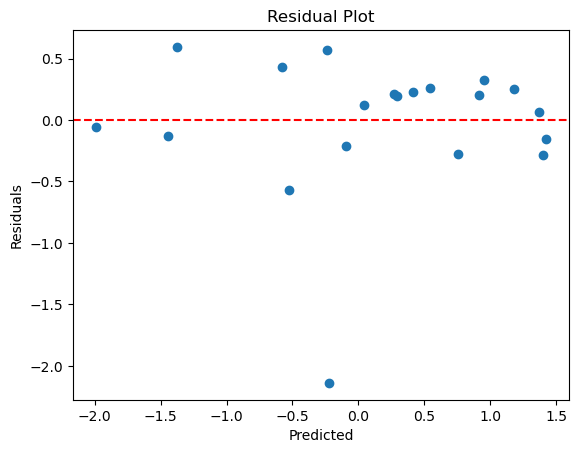

In [181]:
# Residuals Plot
residuals = y_test - y_pred
plt.scatter(y_pred, residuals)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [199]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [200]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [201]:
# Neural Network Regression 
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_reg.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_reg, y_reg, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/100


C:\Users\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 178ms/step - loss: 3.1632 - mae: 1.4912 - val_loss: 0.5925 - val_mae: 0.6656
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 1.3912 - mae: 0.9612 - val_loss: 0.7784 - val_mae: 0.6673
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 1.5594 - mae: 1.0023 - val_loss: 0.4436 - val_mae: 0.5801
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.7532 - mae: 0.7382 - val_loss: 0.8205 - val_mae: 0.8143
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 0.9387 - mae: 0.8264 - val_loss: 0.7765 - val_mae: 0.7729
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.7785 - mae: 0.7289 - val_loss: 0.3592 - val_mae: 0.5312
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.6209 - mae: 0.6418 - val_loss: 0.2038 - val_mae: 0.4044
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.5956 - mae: 0.5980 - val_loss: 0.1769 - val_mae: 0.3779
Epoch 9/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.5678 - mae: 0.5949 - va

In [216]:
from sklearn.model_selection import train_test_split

# Redefine X and y (if needed)
X = df.drop(columns=['EmployeeID', 'Name', 'PerformanceScore'])
y = df['PerformanceScore']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rebuild or retrain the model if not reused
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')
])
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

# Evaluate
loss, mae = model.evaluate(X_test, y_test)
print(f"\nTest Set Evaluation:\nMean Squared Error: {loss:.4f}\nMean Absolute Error: {mae:.4f}")


C:\Users\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 559ms/step - loss: 6.5632 - mae: 2.3784 - val_loss: 2.7861 - val_mae: 1.5302
Epoch 2/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 3.6294 - mae: 1.6770 - val_loss: 0.9971 - val_mae: 0.8678
Epoch 3/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 394ms/step - loss: 1.6870 - mae: 1.1201 - val_loss: 0.5130 - val_mae: 0.5525
Epoch 4/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.8523 - mae: 0.7911 - val_loss: 0.9317 - val_mae: 0.8224
Epoch 5/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.8089 - mae: 0.6713 - val_loss: 1.6292 - val_mae: 1.0804
Epoch 6/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 1.2457 - mae: 0.8854 - val_loss: 2.0868 - val_mae: 1.2236
Epoch 7/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 1.4614 - mae: 0.9814 - val_loss: 2.1244 - val_mae: 1.2352
Epoch 8/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - loss: 1.4199 - mae: 0.9645 - val_loss: 1.7936 - val_mae: 1.1296
Epoch 9/100
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 1.3582 - 

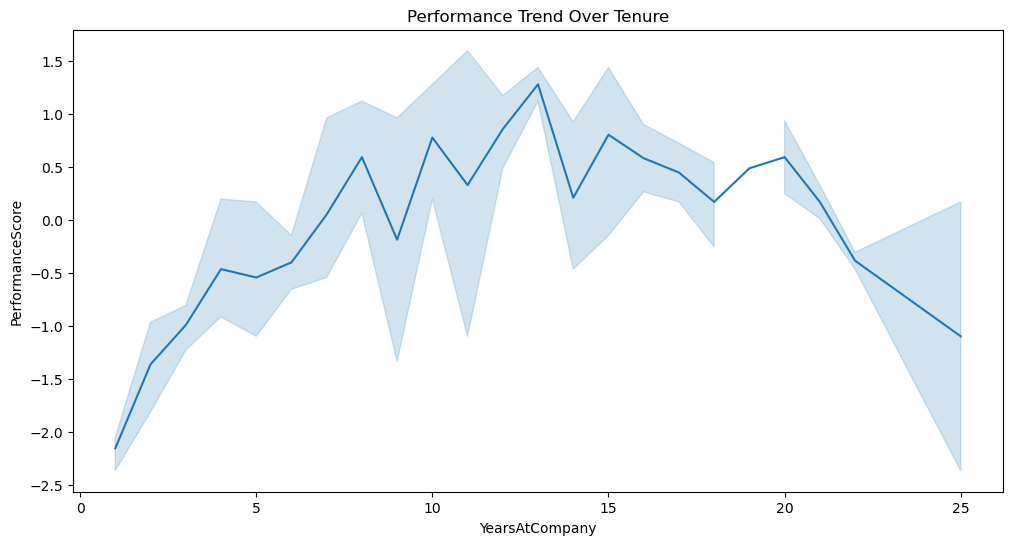

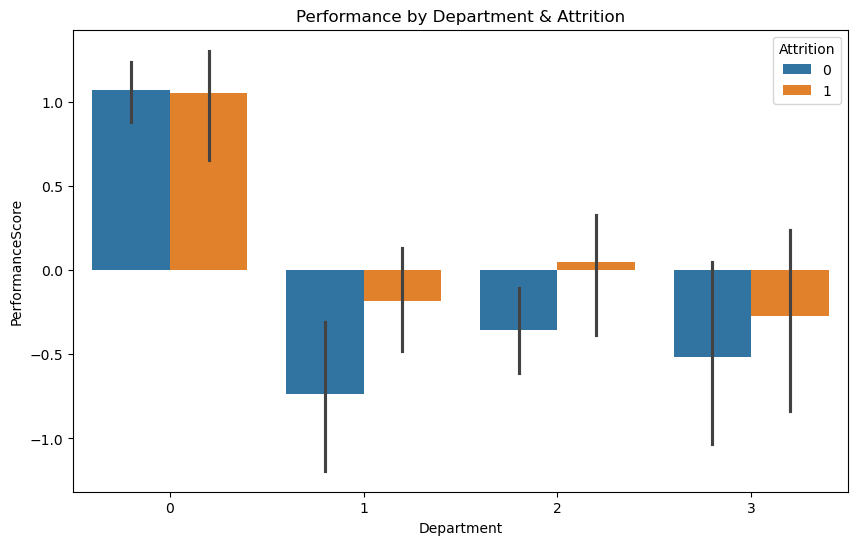

In [202]:
# Trend Visualizations
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='YearsAtCompany', y='PerformanceScore')
plt.title('Performance Trend Over Tenure')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='PerformanceScore', hue='Attrition', data=df)
plt.title('Performance by Department & Attrition')
plt.show()